In [3]:
# Gerekli Kütüphaneler Eklendi #
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


girdi = pd.read_csv('sahibinden.csv')  # Veri seti eklendi
girdi.head()
girdi.shape
girdi.info()  # Veri setinin okunduğu kontrol edildi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   oda_sayisi     100 non-null    int64
 1   salon_sayisi   100 non-null    int64
 2   m2             100 non-null    int64
 3   bina_yasi      100 non-null    int64
 4   bulundugu_kat  100 non-null    int64
 5   balkon_sayisi  100 non-null    int64
 6   aidat          100 non-null    int64
 7   fiyat          100 non-null    int64
dtypes: int64(8)
memory usage: 6.4 KB


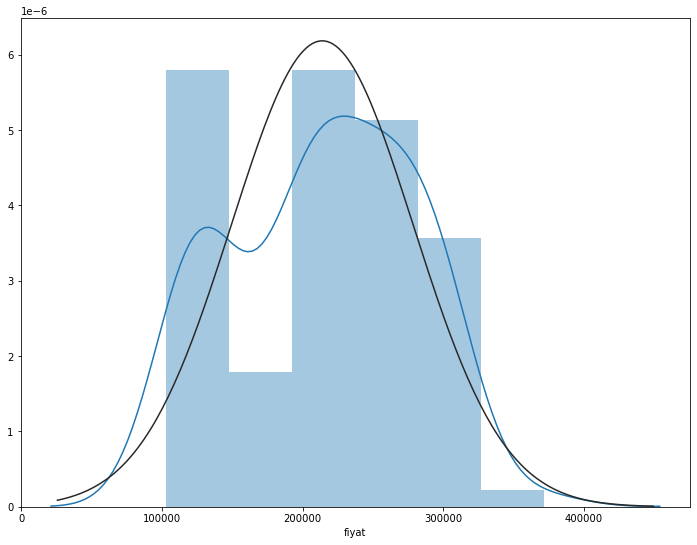

In [2]:
# Ev Fiyatları İncelendi
plt.subplots(figsize=(12, 9))
sns.distplot(girdi['fiyat'], fit=stats.norm)
(mu, sigma) = stats.norm.fit(girdi['fiyat'])
plt.show()


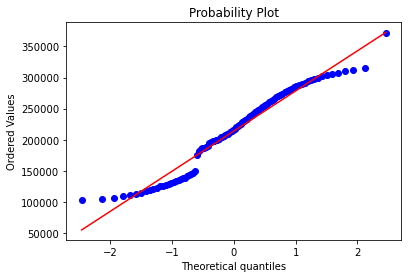

In [4]:
# Olasılık durumu grafiği 
fig = plt.figure()
stats.probplot(girdi["fiyat"], plot=plt)
plt.show()


In [4]:
# numpy kütüphanesiyle logaritmik dönüşüm yapıldı
girdi['fiyat'] = np.log1p(girdi['fiyat'])

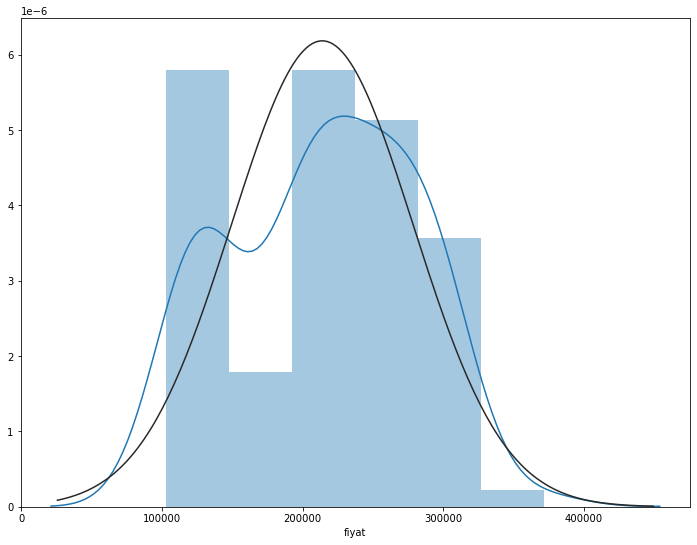

In [5]:
# Normal dağılım kontrol edildi 
plt.subplots(figsize=(12, 9))
sns.distplot(girdi['fiyat'], fit=stats.norm)
(mu, sigma) = stats.norm.fit(girdi['fiyat'])


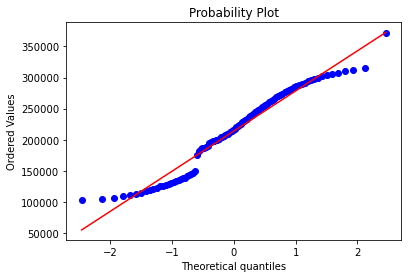

In [6]:
# Olasılık durumu görselleştirildi 
fig = plt.figure()
stats.probplot(girdi['fiyat'], plot=plt)
plt.show()

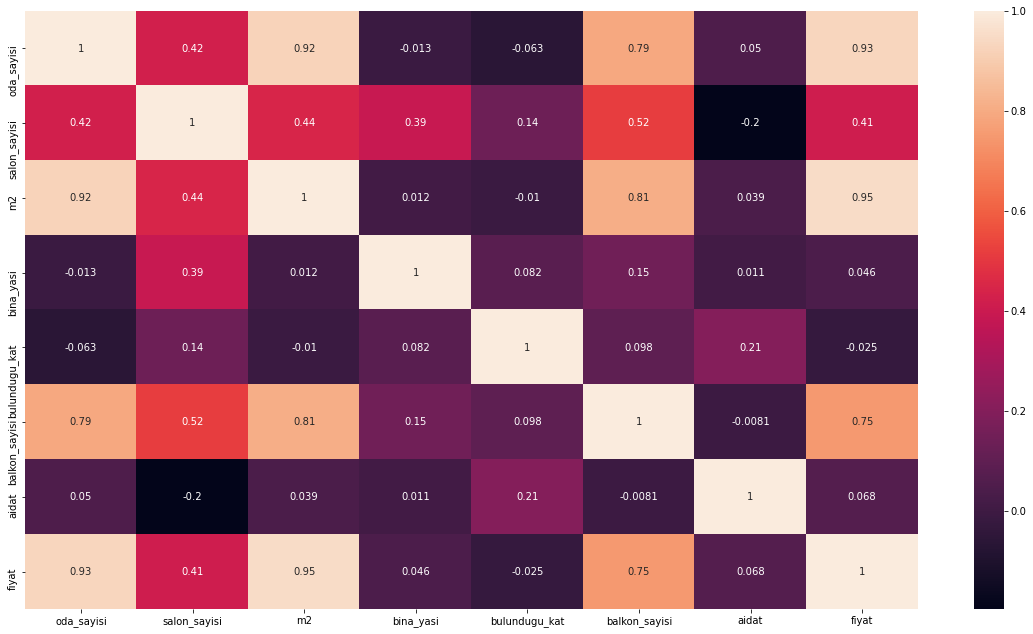

In [7]:
# Veriler arasındaki korelasyona bakıldı #
girdi_corr = girdi.select_dtypes(include=[np.number])
girdi_corr.shape

corr =girdi_corr.corr()
plt.subplots(figsize = (20, 11))
sns.heatmap(corr, annot = True)



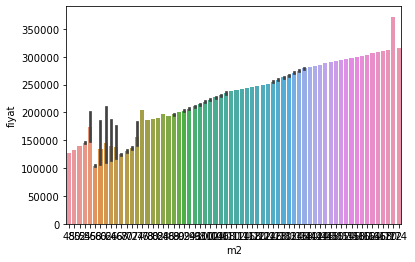

In [8]:
# Satış fiyatı ile en iyi ilişki içerisinde olan özellik m2 olarak belirlendikten sonra aralarındaki
# ilişki çubuk grafik üzerinde gösterildi 
girdi.m2.unique()
sns.barplot(girdi.m2, girdi.fiyat)
plt.show()

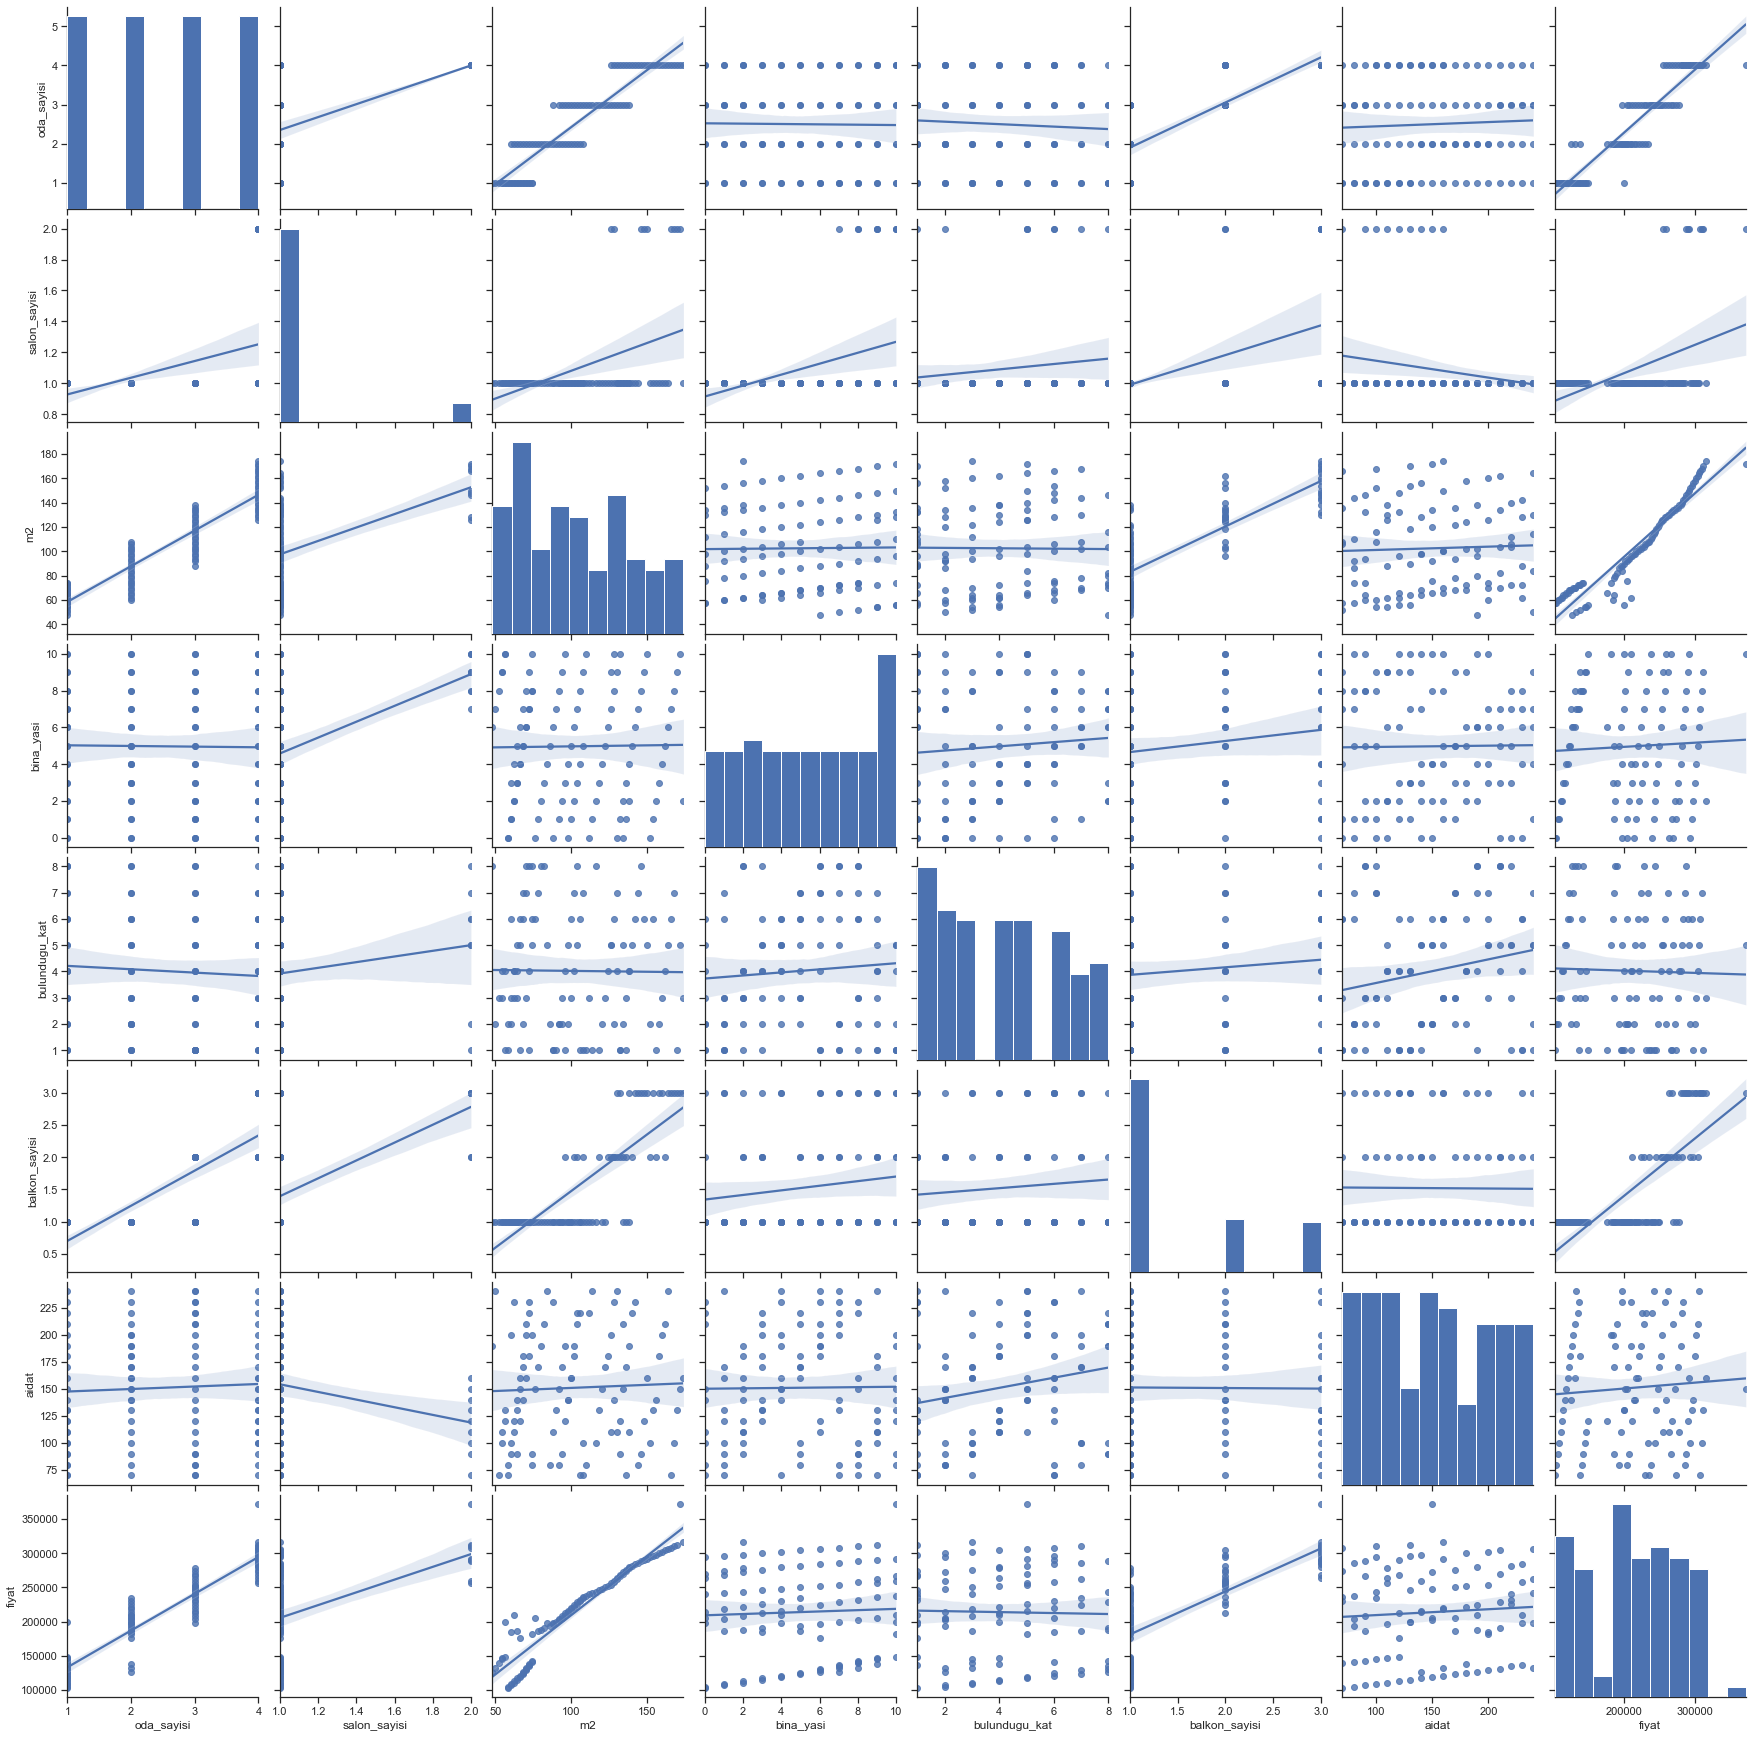

In [9]:
col = ['oda_sayisi', 'salon_sayisi', 'm2', 'bina_yasi', 'bulundugu_kat', 'balkon_sayisi', 'aidat', 'fiyat']
sns.set(style='ticks')
sns.pairplot(girdi[col], height=3, kind='reg')
plt.show()


In [10]:
# Hedef değişken ile olan ilişkiler yazdırıldı
print('Hedef değişken(fiyat) ile en iyi ilişkisi olan değişkeni bulalım')
corr = girdi.corr()
corr.sort_values(['fiyat'], ascending=False, inplace=True)
print(corr.fiyat)

Hedef değişken(fiyat) ile en iyi ilişkisi olan değişkeni bulalım
fiyat            1.000000
m2               0.950454
oda_sayisi       0.930664
balkon_sayisi    0.747739
salon_sayisi     0.413125
aidat            0.068431
bina_yasi        0.046104
bulundugu_kat   -0.024689
Name: fiyat, dtype: float64


In [13]:
y = girdi['fiyat']
del girdi['fiyat']

X = girdi.values
y = y.values

#(%80 eğitim, % 20 test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

from sklearn import linear_model
model1 = linear_model.LinearRegression()

#Verilerin modele uygulanması
model1.fit(X_train, y_train)

print("Tahmin edilen değer : " + str(model1.predict([X_test[5]])))
print("Gerçek değer : " + str(y_test[1]))
print("Doğruluk oranı :  ", model1.score(X_test, y_test)* 100)


Tahmin edilen değer : [135231.52708347]
Gerçek değer : 132000
Doğruluk oranı :   93.04804212256299
